### Naive Bayes Classifier Algorithm Part 2

In [1]:
import pandas as pd

In [8]:
df=pd.read_csv("spam.csv",encoding= 'unicode_escape')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.groupby('Category').describe()

Message         \
                                                     count unique   
Category                                                            
ham                                                   4825   4516   
ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT...       1      1   
ham\tYeah                                                1      1   
spam                                                   747    641   

                                                                                                       \
                                                                                                  top   
Category                                                                                                
ham                                                                            Sorry, I'll call later   
ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT...                                DEVIOUSBITCH.ANYWAY   
ham\tYeah                                                       give me a call if you've got a minute   
spam                                                Please call our customer service representativ...   

                                                         
                                                   freq  
Category                                                 
ham                                                  30  
ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT...    1  
ham\tYeah                                             1  
spam                                                  4

In [10]:
df['spam']=df['Category'].apply(lambda x: 1 if x=="spam" else 0)

In [11]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(df.Message, df.spam, test_size=0.2)

Mesajları sayılara dönüştürmek içib sayma vektörü tekniği kullanacağız.
Sayma vektörü;

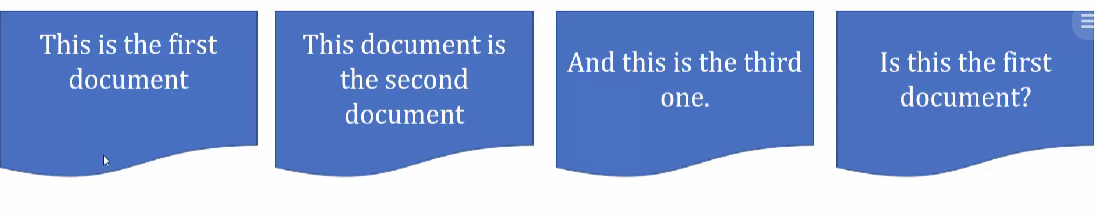 
Böyle bir sınıflandırma yapılacak olsa hangisine gelen dökümanın hangisine yerleştirileceğini dönüştürmenin yolu, bu dosyalarda benzersiz kelimeler bulunur.
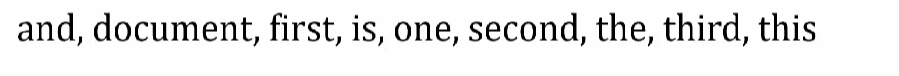
Bu kelimelerle bir matris oluşturulabir.
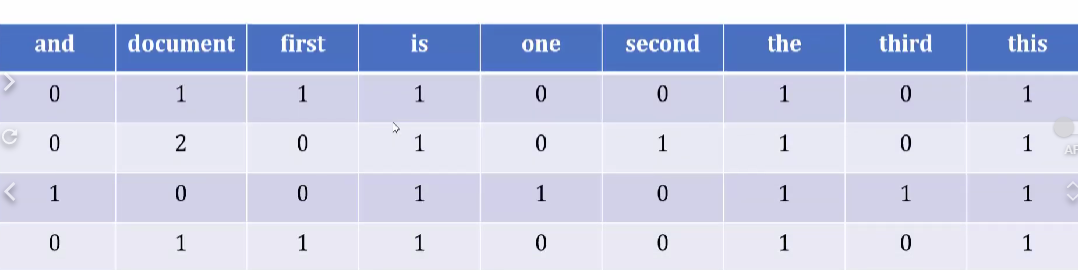

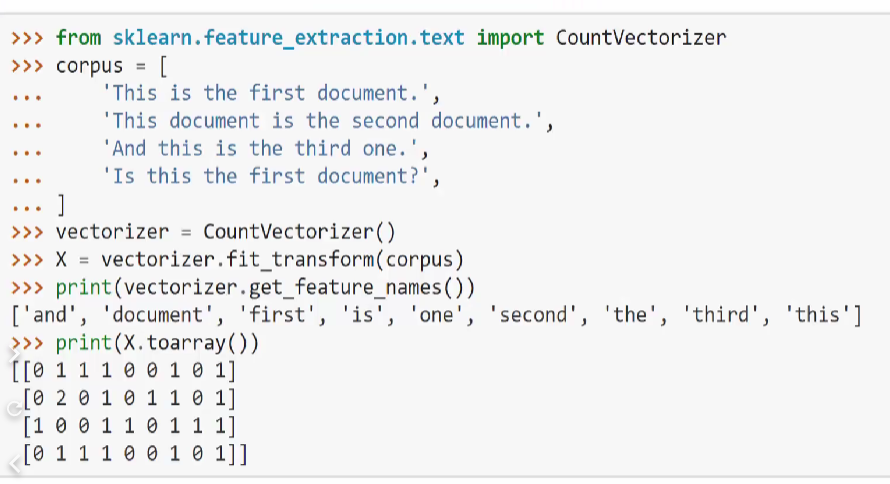

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
v=CountVectorizer()

In [17]:
xtrain_count=v.fit_transform(xtrain.values)
xtrain_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

##### Naive Bayes 3 farklı sınıflandırmaya sahip
* Bernoulli
* Multinominal
* Gaussian

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
model=MultinomialNB()

In [20]:
model.fit(xtrain_count,ytrain)

MultinomialNB()

In [21]:
emails=[
     'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count= v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [22]:
xtest_count=v.transform(xtest)
model.score(xtest_count,ytest)

0.9874439461883409

#### Pipeline kullanmak

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
pipl=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

ilk Pepeline içerisinde bulunan ilk eleman- ilk satır -> text'i vektöre dönüştürme işlemi yapıyor.
ikinci eleman-satır -> Multinominal naive bayes uyguluyor.

In [25]:
# Bu yöntemde dönüştürme uygulamadan direkt olarak metin verilebiliyor.
pipl.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [26]:
pipl.predict(xtest)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [27]:
pipl.score(xtest,ytest) #yukarıdakiyle aynı sonuç

0.9874439461883409

In [41]:
email=[
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'Hey mohan, can we get together to watch footbal game tomorrow?']
pipl.predict(email)

array([1, 0], dtype=int64)

# Exercise


In [47]:
from sklearn import datasets
wine = datasets.load_wine()

In [43]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [45]:
wine.data[0:1]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03]])

In [50]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [51]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [52]:
wine.target[0:3]

array([0, 0, 0])

In [54]:
import pandas as pd
df2 = pd.DataFrame(wine.data,columns=wine.feature_names)
df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [55]:
df2['target']=wine.target

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=100)

In [57]:
from sklearn.naive_bayes import GaussianNB
gaus=GaussianNB()

In [69]:
gaus.fit(X_train,y_train)

GaussianNB()

In [70]:
gaus.score(X_test,y_test)

1.0

In [60]:
from sklearn.naive_bayes import MultinomialNB
multinom=MultinomialNB()

In [72]:
multinom.fit(X_train,y_train)

MultinomialNB()

In [73]:
multinom.score(X_test,y_test)

0.7777777777777778